# IYKRA's Basic Data Analysis Practice Case

On this week's coding module, we are required to solve some basic data analysis cases about hotels' bookings and demands. You can find the dataset here:

https://www.kaggle.com/jessemostipak/hotel-booking-demand

Here are the problems that need to be solved:
1. Where do the guests come from?
2. How much do guests pay for a room per night?
3. How does the price per night vary over the year?
4. Which are the busiest months?
5. How long do people stay at the hotels?
6. Bookings by market segment
7. How many bookings were cancelled?
8. Which month has the highest number of cancellations? 

In [23]:
#Some javacript codes to disable scrolling feature on Jupyter Notebook's output

%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [24]:
#Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('Ritz_Jager_Data.csv')
pd.set_option('display.max_columns', None)

In [25]:
data.head()

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_type,country_origin,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [72]:
#Quick look at the data

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119388 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   hotel_type                      119388 non-null  object         
 1   is_canceled                     119388 non-null  int64          
 2   lead_time                       119388 non-null  int64          
 3   arrival_date_year               119388 non-null  int64          
 4   arrival_date_month              119388 non-null  object         
 5   arrival_date_week_number        119388 non-null  int64          
 6   arrival_date_day_of_month       119388 non-null  int64          
 7   stays_in_weekend_nights         119388 non-null  int64          
 8   stays_in_week_nights            119388 non-null  int64          
 9   adults                          119388 non-null  int64          
 10  children                        119386 non-n

# Question #1

In [28]:
#Listing each guest's origin country

data['country_origin'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [62]:
#Sorting the top 5 origin countries

top_country = data[data['is_canceled'] == 0].groupby('country_origin', as_index = False).agg(frequency = ('country_origin', 'count'))
top_country = top_country.sort_values('frequency', ascending = False)[:5].reset_index(drop = True)
top_country

,country_origin,frequency
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069


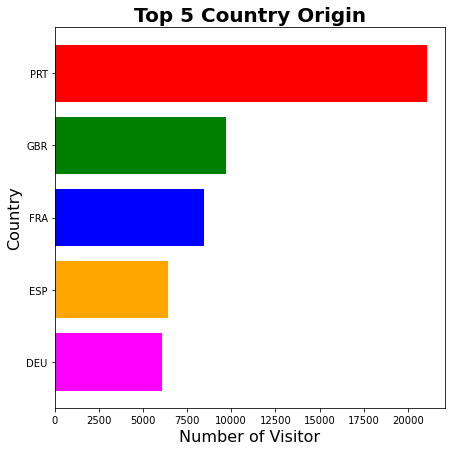

In [71]:
#Plotting

fig, ax = plt.subplots()

ax.barh(top_country['country_origin'], top_country['frequency'], color = ['red', 'green', 'blue', 'orange', 'magenta'])
ax.set_xlabel('Number of Visitor', fontsize = 16)
ax.set_ylabel('Country', fontsize = 16)
ax.set_title('Top 5 Country Origin', fontsize = 20, fontweight = 'bold')
ax.invert_yaxis()
plt.show()

# Question #2

In [57]:
#Calculating the average of 'adr' column

avg_adr = data['adr'].mean().round(2)

print('On average, each guest paid', avg_adr, 'dollars per night')

On average, each guest paid 101.83 dollars per night


# Question #3

In [32]:
#Formatting 'reservation_status_date' column to a datetime format

data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], format = '%d/%m/%Y')
data['reservation_status_year_month'] = data['reservation_status_date'].dt.to_period('M')

In [55]:
#Selecting and aggregating required columns

avg_price = data[data['is_canceled'] == 0].groupby('reservation_status_year_month')
avg_price = avg_price.agg(avg_price_per_night = ('adr', 'mean'))
avg_price.head(10)

,avg_price_per_night
reservation_status_year_month,
2015-07,106.058092
2015-08,116.542176
2015-09,101.011336
2015-10,80.666740
2015-11,59.606427
2015-12,59.822848
2016-01,72.035980
2016-02,68.638702
2016-03,73.363325


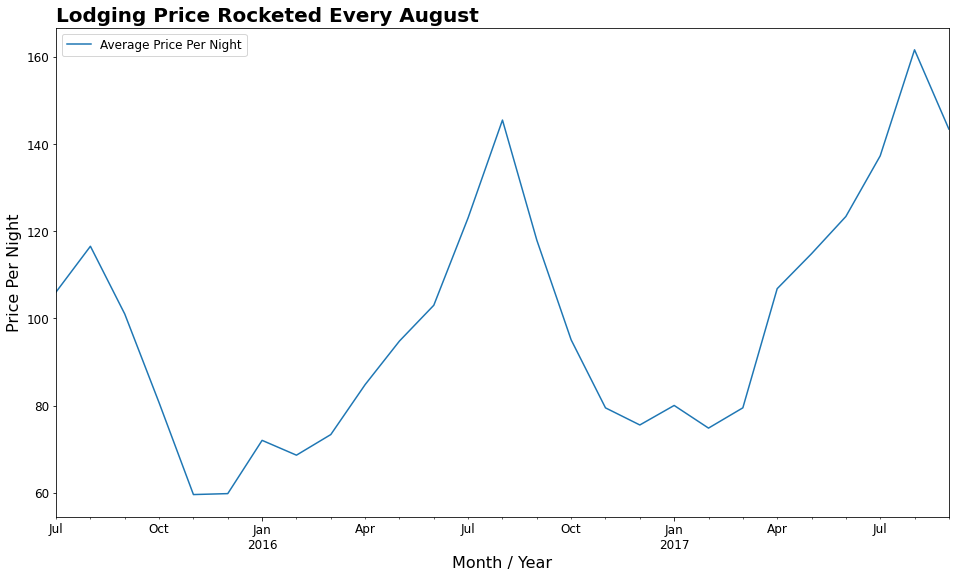

In [34]:
#Plotting

avg_price.plot(figsize = [16, 9], fontsize = 12)
plt.title('Lodging Price Rocketed Every August', fontsize = 20, loc = 'left', fontweight = 'bold')
plt.xlabel('Month / Year', fontsize = 16)
plt.ylabel('Price Per Night', fontsize = 16)
plt.legend(['Average Price Per Night'], fontsize = 12)
plt.show()

# Question #4

In [35]:
#Selecting required columns

busiest_month = data[data['is_canceled'] == 0]
busiest_month = busiest_month.groupby('reservation_status_year_month').agg(number_of_visitors = ('reservation_status_year_month', 'count'))
busiest_month.head(10)

,number_of_visitors
reservation_status_year_month,
2015-07,1321
2015-08,2224
2015-09,2986
2015-10,3304
2015-11,1987
2015-12,1640
2016-01,1985
2016-02,2435
2016-03,3194


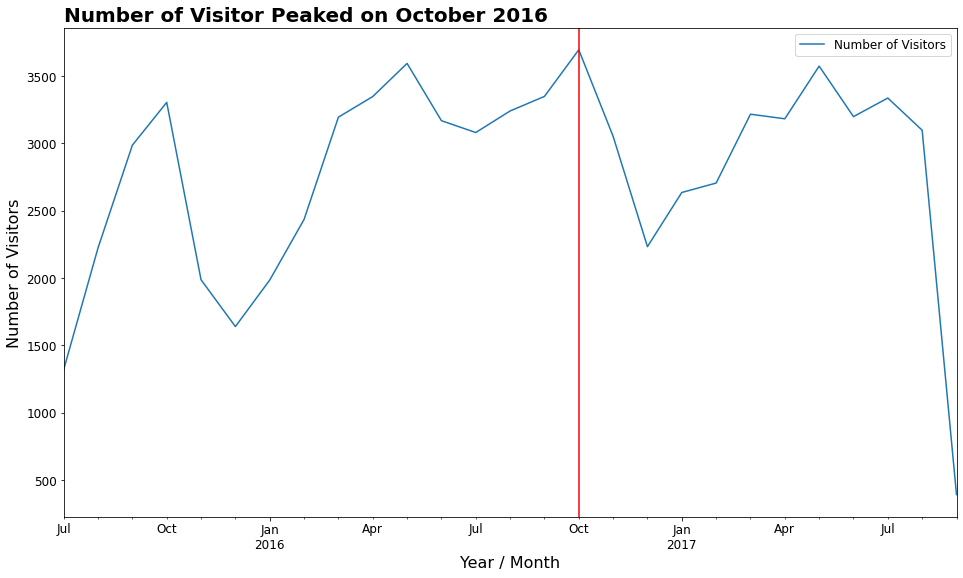

In [36]:
#Plotting

busiest_month.plot(figsize = [16,9], fontsize = 12)
plt.title('Number of Visitor Peaked on October 2016', loc = 'left', fontsize = 20, fontweight = 'bold')
plt.xlabel('Year / Month', fontsize = 16)
plt.ylabel('Number of Visitors', fontsize = 16)
plt.axvline(x = busiest_month.index[busiest_month['number_of_visitors'] == busiest_month['number_of_visitors'].max()], color = 'red')
plt.legend(['Number of Visitors'], fontsize = 12)
plt.show()

# Question #5

In [37]:
#Selecting required columns

arrival_col = data[['arrival_date_year','arrival_date_month','arrival_date_day_of_month']][data['is_canceled'] == 0]
data['arrival_date'] = arrival_col.apply(lambda x: '-'.join(x.astype('str')), axis = 1)

In [38]:
#Convert it to datetime format

data['arrival_date'] = pd.to_datetime(data['arrival_date'])

In [39]:
#Calculate the difference betweeen check-out date and arrival date

data['stay_time'] = data['reservation_status_date'] - data['arrival_date']

#Calculate the mean then print it
avg_stay_time = data['stay_time'].mean()

print('The average stay time is', avg_stay_time)

The average stay time is 3 days 09:22:08.483622914


# Question #6

In [40]:
#Viewing market segment distribution

data['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [41]:
#Dropping the 'Undefined' records

data.drop(data[data['market_segment'] == 'Undefined'].index, inplace = True)

In [42]:
#Preparing the required data to plot

segment_labels = data['market_segment'].value_counts().index.tolist()
segment_values = data['market_segment'].value_counts().tolist()

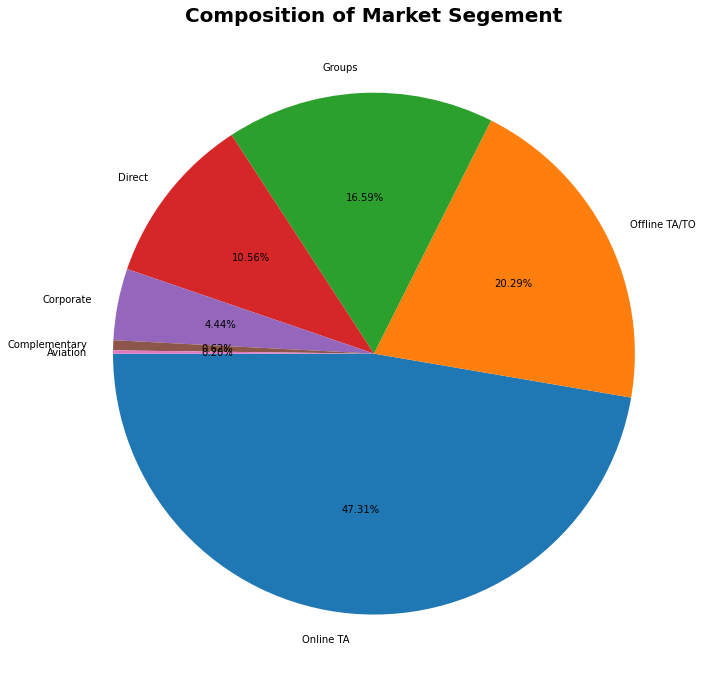

In [77]:
#Plotting

plt.rcParams['figure.figsize'] = 12,12
plt.pie(segment_values, labels = segment_labels, autopct = '%.2f%%', startangle = 180)
plt.title('Composition of Market Segement', fontsize = 20, fontweight = 'bold')
plt.show()

# Question #7

In [45]:
#Counting cancelled booking records

num_cancelled_bookings = data['is_canceled'].value_counts()[1]

print('Number of cancelled bookings:', num_cancelled_bookings)

Number of cancelled bookings: 44222


# Question #8

In [47]:
#Selecting and Aggregating required columns

cancelled_bookings = data[data['is_canceled'] == 1]
cancelled_bookings = cancelled_bookings.groupby('reservation_status_year_month').agg(avg_num_cancelled_bookings = ('reservation_status_year_month', 'count'))

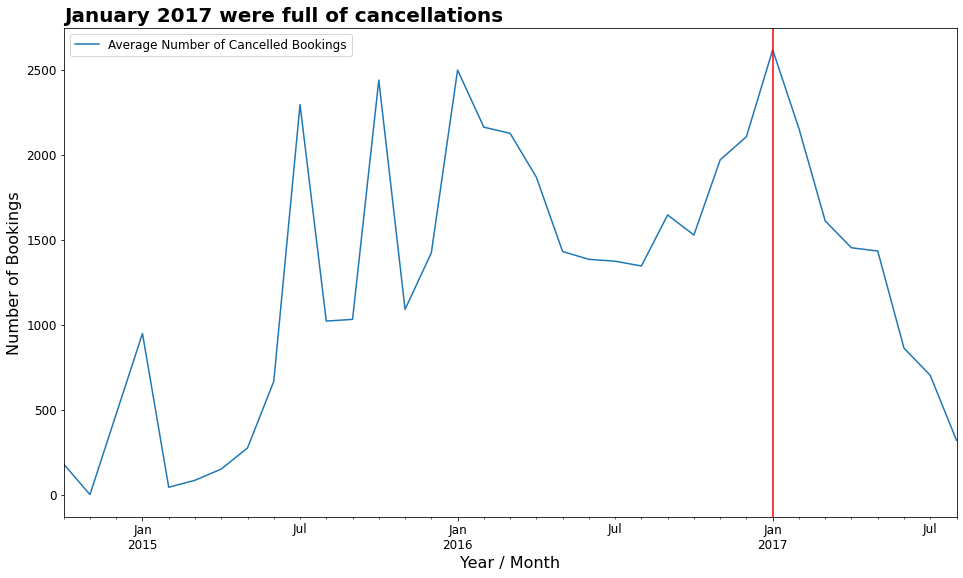

In [48]:
#Plotting

cancelled_bookings.plot(figsize = (16,9), fontsize = 12)
plt.title('January 2017 were full of cancellations', loc = 'left',fontsize = 20, fontweight = 'bold')
plt.xlabel('Year / Month', fontsize = 16)
plt.ylabel('Number of Bookings', fontsize = 16)
plt.legend(['Average Number of Cancelled Bookings'], fontsize =12)
plt.axvline(x = cancelled_bookings.index[cancelled_bookings['avg_num_cancelled_bookings'] == cancelled_bookings['avg_num_cancelled_bookings'].max()], color = 'red')
plt.show()